<a href="https://colab.research.google.com/github/zayar64/beta/blob/main/100p_20epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3/3 [==============================] - 1s 295ms/step - loss: 2.2186 - accuracy: 0.5286
Loss on validation set : 2.218574047088623
Accuracy on validation set : 0.5285714268684387
1/1 [==============================] - 1s 555ms/step


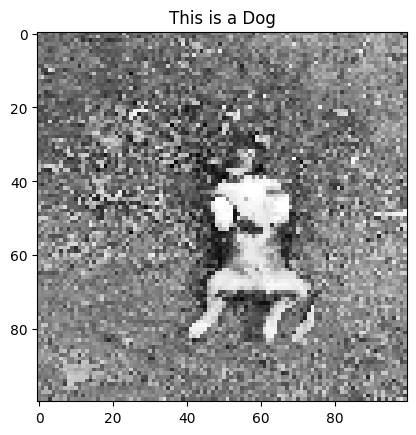

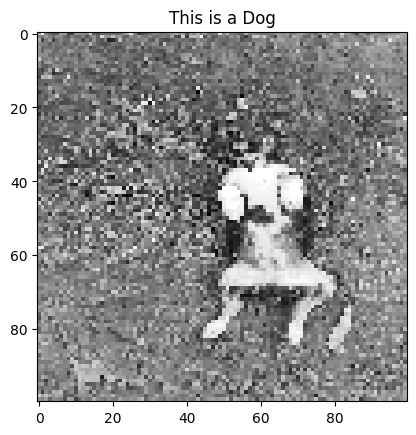

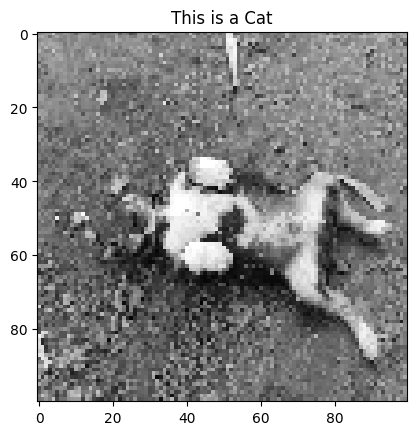

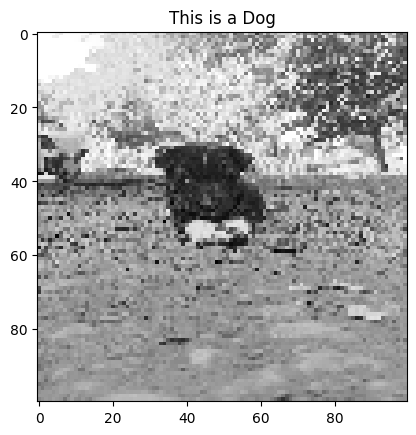

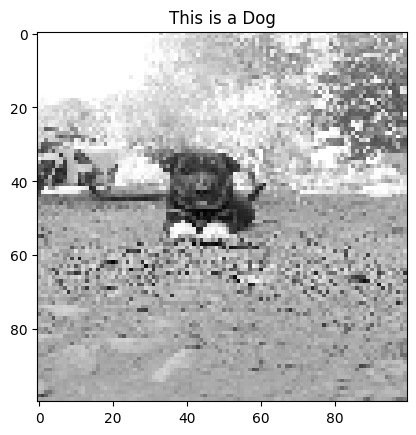

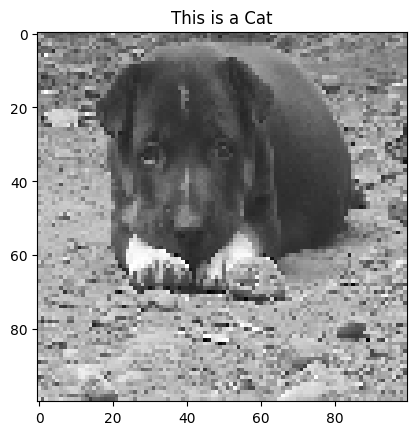

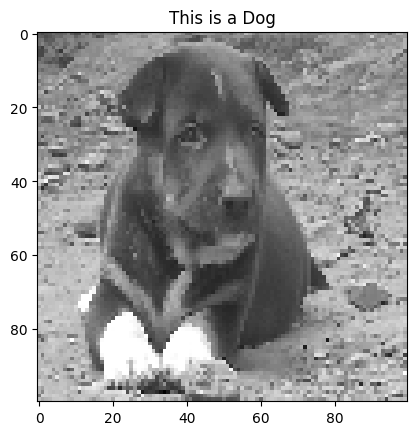

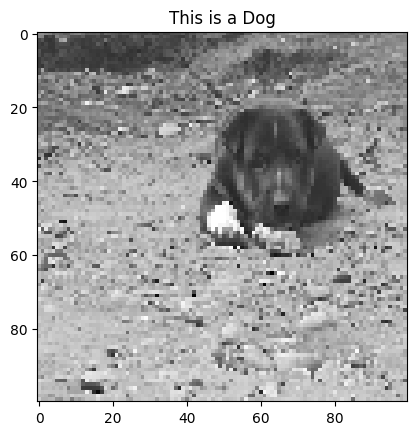

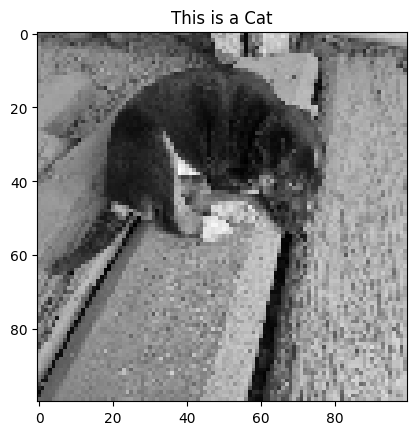

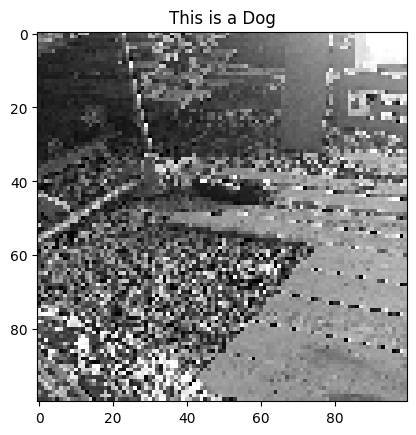

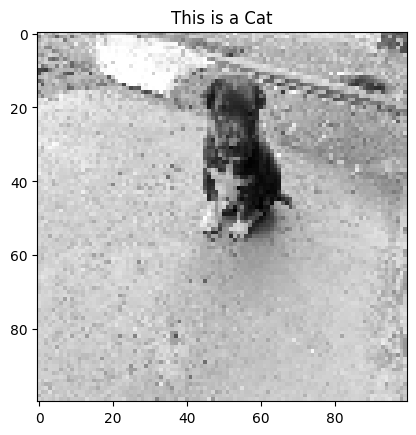

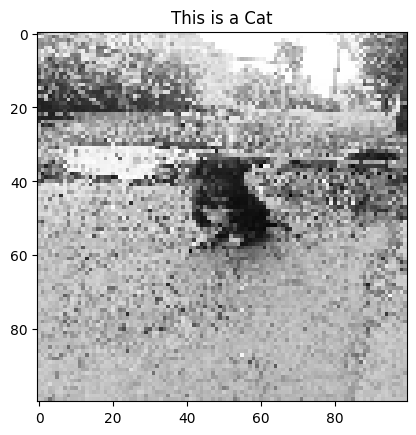

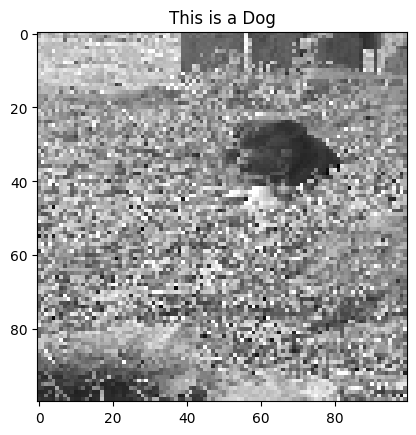

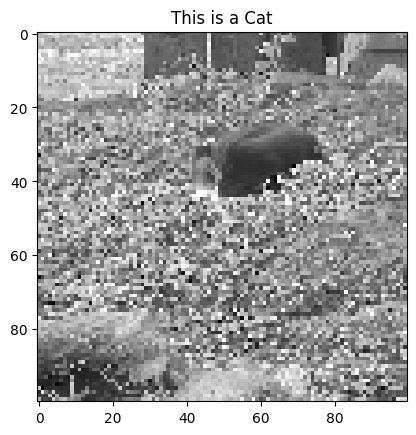

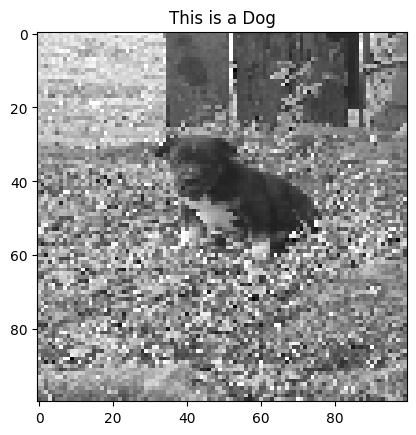

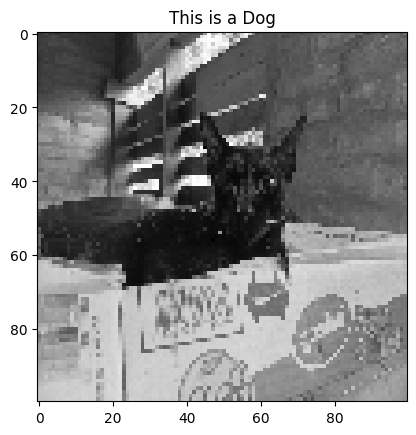

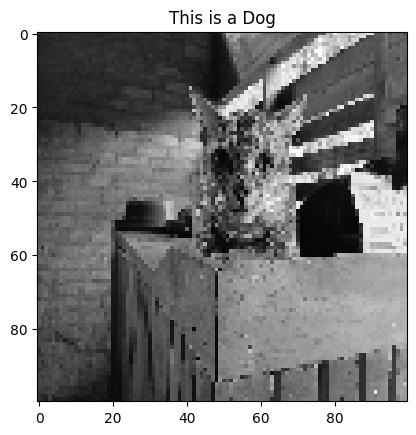

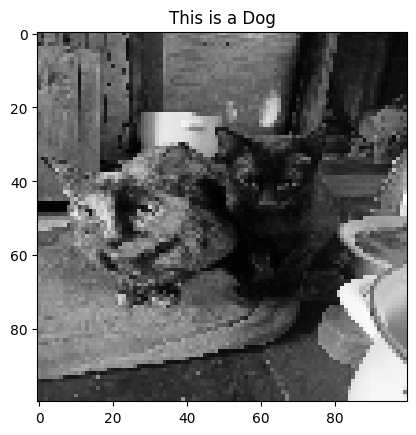

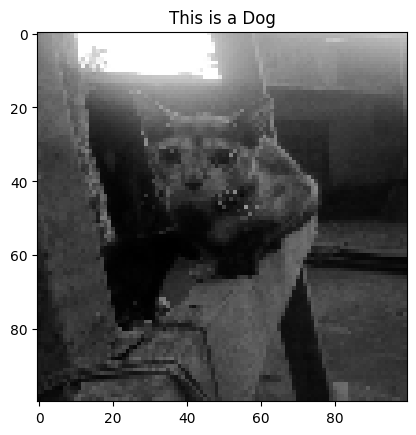

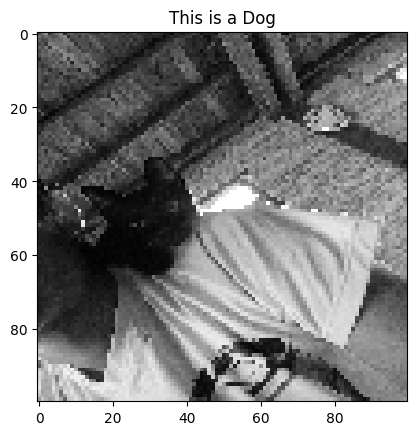

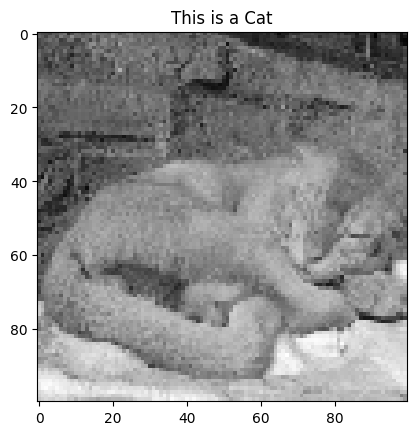

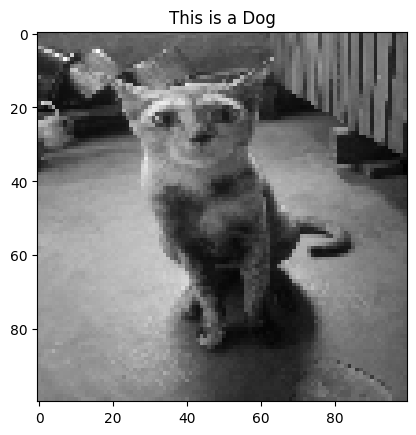

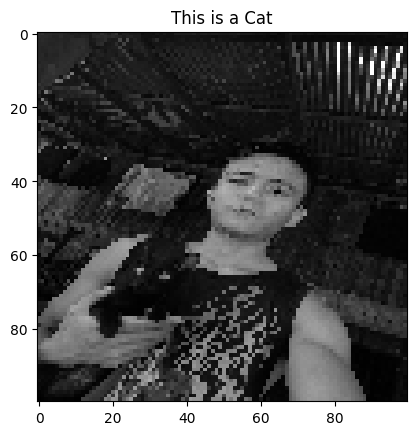

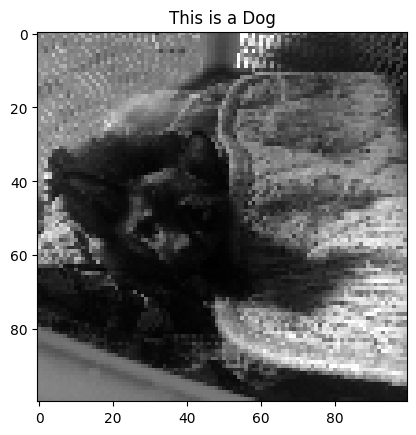

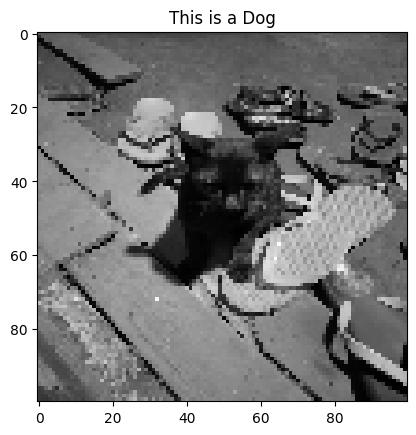

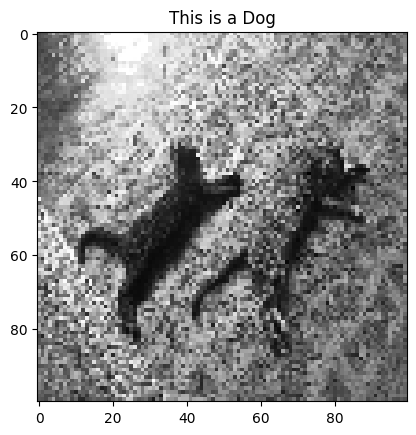

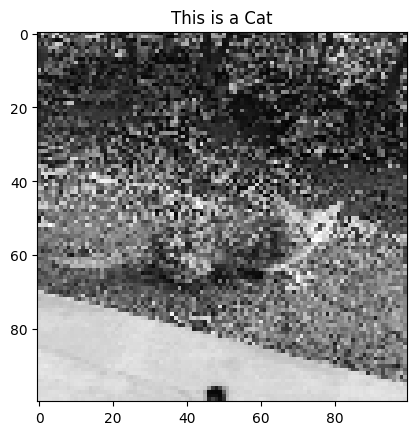

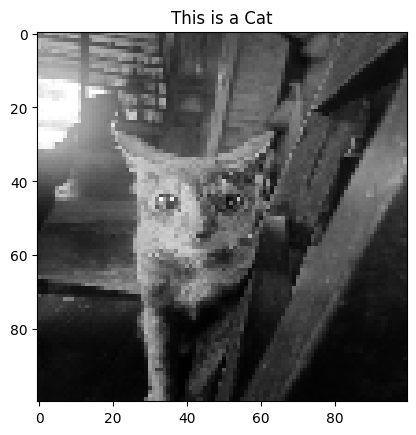

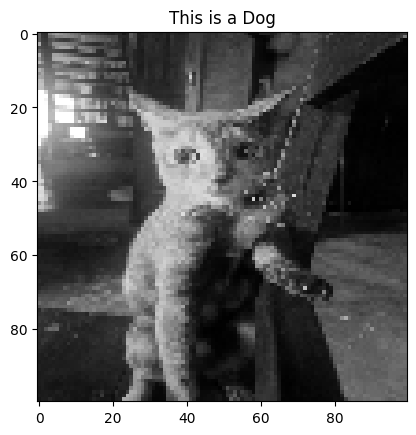

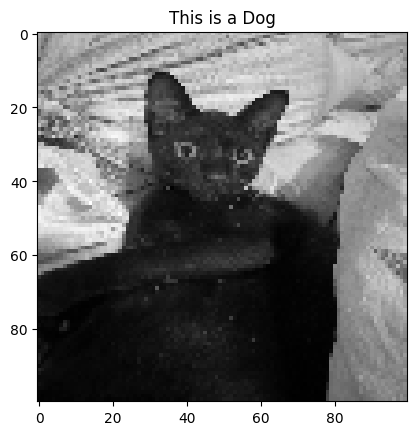

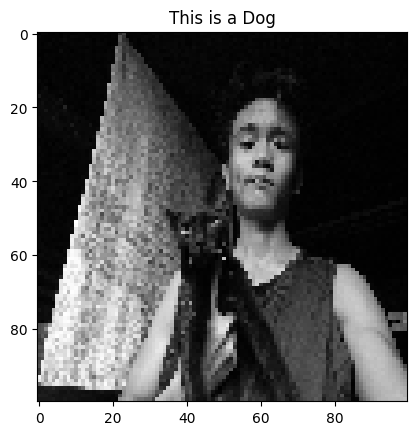

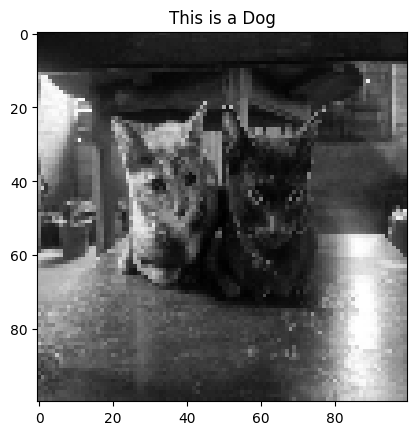

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
import os, pickle

from sklearn import model_selection
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Activation


img_size = 100
def normalize_img(images, img_size=img_size):
    normalized_img = []
    for img in images:
        img = cv.imread(img, cv.IMREAD_GRAYSCALE)
        normalized_img.append(cv.resize(img, (img_size, img_size)))
    normalized_img = np.array(normalized_img).reshape(-1, img_size, img_size, 1)
    return normalized_img

X = pickle.load(open(f"/{img_size}p_X.pickle", "rb"))
X = X / 255.0
y = pickle.load(open("/y.pickle", "rb"))
y[y == "cat"] = 0
y[y == "dog"] = 1
y = y.astype("int")

X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.1, random_state=64)

dim_size = 128
model = Sequential()
model.add(Conv2D(dim_size, (3,3), input_shape=(img_size, img_size, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(dim_size, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(dim_size, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#model.fit(X_train, y_train, epochs=20)
#model.save(f"/trained_{img_size}p_{dim_size}D")

model = tf.keras.models.load_model(f"/trained_{img_size}p_{dim_size}D")

loss, accuracy = model.evaluate(X_valid, y_valid)
print("Loss on validation set :", loss)
print("Accuracy on validation set :", accuracy)

my_pets = pickle.load(open(f"/{img_size}p_my_pets.pickle", "rb"))
predictions = model.predict(my_pets)

preds = []
for i in predictions:
    if i < 0.5:
        preds.append("Cat")
    else:
        preds.append("Dog")


index = np.random.randint(0, len(my_pets)-1)
for index in range(len(my_pets)):
    plt.imshow(my_pets[index], cmap="gray")
    plt.title(f"This is a {preds[index]}")
    plt.show()